In [1]:
# Calling required libraries
import numpy as np
import pandas as pd

# Loading dataset directly from Google Drive
url = 'https://drive.google.com/file/d/1pQxtljlNVh0DHYg-Ye7dtpDTlFceHVfa/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [2]:
# Using LabelEncoder to encode categorical data ('R' or 'M' to 0 or 1)
from sklearn.preprocessing import LabelEncoder
df[60] = LabelEncoder().fit_transform(df[60])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [3]:
# Correlation between target variable (column 60) and other feature variables
#df.corr()[60]

# Correlation + sorting and only 10 most correlated features
df.corr()[60].sort_values(ascending=False).nlargest(10)

60    1.000000
35    0.269151
34    0.227670
36    0.209055
33    0.172010
30    0.110728
32    0.107184
31    0.055275
37    0.040527
39    0.035928
Name: 60, dtype: float64

In [4]:
# Dataset have more than 50 features, reduce number of features based on correlation value
# Create new dataframe by selecting only the 6 most correlated features
df = df.filter([32,30,33,36,34,35,60], axis=1)
df.head()

,32,30,33,36,34,35,60
0,0.5121,0.1307,0.7547,0.6692,0.8537,0.8507,1
1,0.1984,0.3788,0.2341,0.3835,0.1306,0.4182,1
2,0.1862,0.8512,0.2709,0.6116,0.4232,0.3043,1
3,0.6120,0.6260,0.3497,0.5408,0.3953,0.3012,1
4,0.2881,0.5103,0.0981,0.4604,0.1951,0.4181,1


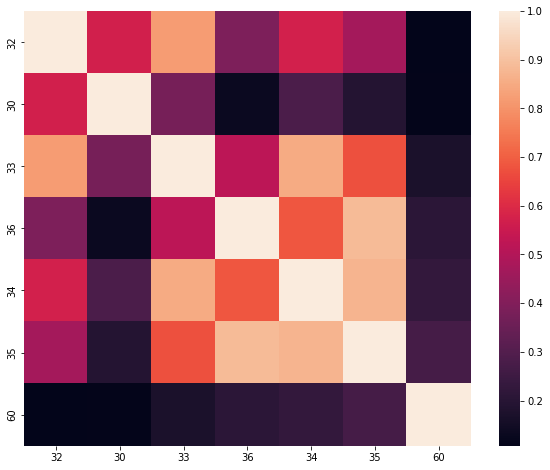

In [5]:
# Examine correlation (after selecting only 6 most correlated features)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

In [6]:
# Count value of 'R'=1 and 'M'=0 in column 60
#df[60].value_counts()

# Count percentage of 'R'=1 and 'M'=0 in column 60
df[60].value_counts() / len(df) * 100

0    53.365385
1    46.634615
Name: 60, dtype: float64

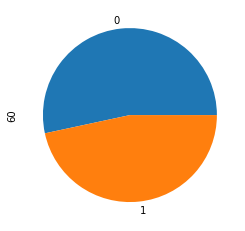

In [7]:
# Using pie chart we can see that both Target if almost balance
df[60].value_counts().plot.pie()

In [8]:
# Splitting dataset
X = df.drop([60], axis=1)
y = df[60]

# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

print(f'X_train shape   : {X_train.shape}')
print(f'X_test shape    : {X_test.shape}')
print(f'y_train shape   : {y_train.shape}')
print(f'y_test shape    : {y_test.shape}')

X_train shape   : (166, 6)
X_test shape    : (42, 6)
y_train shape   : (166,)
y_test shape    : (42,)


In [9]:
pip install auto-sklearn

In [10]:
# Call auto-sklearn library - Classification
from autosklearn.classification import AutoSklearnClassifier

# Model (with time setting)
clf = AutoSklearnClassifier(time_left_for_this_task=300, 
                              per_run_time_limit=9, 
                              ensemble_size=1, 
                              initial_configurations_via_metalearning=0)

# Init training
clf.fit(X_train, y_train)

# Model Training score
print('Model Training Score :', clf.score(X_train, y_train))

# Model Training score
print('Model Test Score     :', clf.score(X_test, y_test))

Model Training Score : 0.6987951807228916
Model Test Score     : 0.6666666666666666


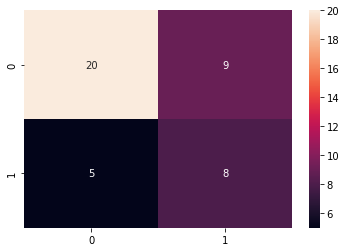

In [11]:
# Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_pred, y_test)
sns.heatmap(conf_matrix, annot=True)

In [12]:
#Performance Measures
tn = conf_matrix[0,0]
fp = conf_matrix[0,1]
tp = conf_matrix[1,1]
fn = conf_matrix[1,0]

total = tn + fp + tp + fn
real_positive = tp + fn
real_negative = tn + fp

accuracy  = round((tp + tn) / total,4)     # Accuracy Rate
precision = round(tp / (tp + fp), 4)       # Positive Predictive Value
recall    = round(tp / (tp + fn), 4)       # True Positive Rate
f1score  = round(2 * precision * recall / (precision + recall), 4)

print(f'Accuracy    : {accuracy}')
print(f'Precision   : {precision}')
print(f'Recall      : {recall}')
print(f'F1 score    : {f1score}')

Accuracy    : 0.6667
Precision   : 0.4706
Recall      : 0.6154
F1 score    : 0.5333


In [15]:
# Test model with sample input, if result 1 = Rock, 0 = Mine
# test_input = (0.1862,0.8512,0.2709,0.6116,0.4232,0.3043
test_input = (0.5197, 0.7717, 0.1786, 0.1066, 0.1098, 0.1446)
input_array = np.asarray(test_input)
input_reshaped = input_array.reshape(1,-1)

predict = clf.predict(input_reshaped)
print('Predicted Class: %d' % predict[0])

Predicted Class: 0
